<a href="https://colab.research.google.com/github/Creatrohit9/-Online-Retail-Customer-Segmentation/blob/main/Running_Online_Retail_Customer_Segmentation_(Proponent_Ds)_Rohit_Bhadauriya_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational(extending or going beyond national boundaries transnational corporations.) data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Data Segmentation** is the process of taking the data you hold and dividing it up and grouping similar data together based on the chosen parameters so that you can use it more efficiently within marketing and operations. Examples of Data Segmentation could be:

Gender
Customers vs. Prospects
Industry

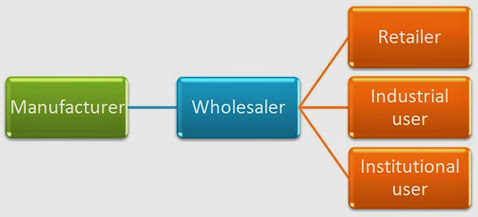

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [18]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
#Defining path
file_path = "/content/drive/MyDrive/4-capston project unsupervised machine learning online retail/Copy of Online_Retail.xlsx"
dataset = pd.read_excel(file_path)

In [21]:
#Take a look
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [22]:
dataset.shape

(541909, 8)

We hae 541909 customer's records and 8 features.

In [23]:
# dat description for the info
dataset.describe(include='all',datetime_is_numeric=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156151552,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


### Compairing mean and median we found that there can outliers in the dataset.

In [24]:
#all the columns in the data set 
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [25]:
#data information for the analysis
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


There are some null values

In [26]:
# checkng for some null value
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

CustomerID has highest null values.

In [27]:
#dealing with null values
dataset.dropna(inplace=True)

In [28]:
#rechecking after removing null records
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


Now we have no null values

In [29]:

dataset['InvoiceNo'] = dataset['InvoiceNo'].astype('str')

In [30]:
# droping some index starting with c
dataset=dataset[~dataset['InvoiceNo'].str.contains('C')]

we have to drop some InvoiceNo which are starts with 'c' because 'c', it indicates a cancellation

#Finding categorical features in our dataset.

In [31]:
# see all the date or diffrent sesaons and holiday and functioning day
print(dataset['InvoiceNo'].unique())
print(dataset['StockCode'].unique())
print(dataset['Description'].unique())
print(dataset['Country'].unique())

['536365' '536366' '536367' ... '581585' '581586' '581587']
['85123A' 71053 '84406B' ... '90214Z' 90089 23843]
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'PINK CRYSTAL SKULL PHONE CHARM'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


# **DataSet Information**

In [32]:
# Extracting information from Invoice feature.
dataset['InvoiceDate_year'] = dataset['InvoiceDate'].dt.year
dataset['InvoiceDate_month'] = dataset['InvoiceDate'].dt.month
dataset['InvoiceDate_day'] = dataset['InvoiceDate'].dt.day
dataset['InvoiceDate_hour'] = dataset['InvoiceDate'].dt.hour
dataset['InvoiceDate_minute'] = dataset['InvoiceDate'].dt.minute
dataset['InvoiceDate_second'] = dataset['InvoiceDate'].dt.second

In [34]:
print("Columns and data types")
pd.DataFrame(dataset.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
InvoiceDate_year,int64
InvoiceDate_month,int64


In [35]:
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

In [36]:
dataset.shape

(397924, 14)

Now we have total 14 columns.

In [37]:
dataset.describe(include='all',datetime_is_numeric=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,InvoiceDate_minute,InvoiceDate_second
count,397924,397924,397924,397924.000000,397924,397924.000000,397924.000000,397924,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.0
unique,18536,3665,3877,NaN,NaN,NaN,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN
freq,542,2035,2028,NaN,NaN,NaN,NaN,354345,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,13.021823,2011-07-10 23:43:36.912393728,3.116174,15294.315171,NaN,2010.934259,7.612537,15.042181,12.728247,30.408013,0.0
min,NaN,NaN,NaN,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,NaN,2010.000000,1.000000,1.000000,6.000000,0.000000,0.0
25%,NaN,NaN,NaN,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,NaN,2011.000000,5.000000,7.000000,11.000000,16.000000,0.0
50%,NaN,NaN,NaN,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,NaN,2011.000000,8.000000,15.000000,13.000000,31.000000,0.0
75%,NaN,NaN,NaN,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,NaN,2011.000000,11.000000,22.000000,14.000000,45.000000,0.0
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,NaN,2011.000000,12.000000,31.000000,20.000000,59.000000,0.0


In [38]:
# creating a list of interger and float columns
numerical_columns=list(dataset.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'CustomerID', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

In [39]:
# creating a list of categorical columns
categorical_columns=list(dataset.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

We have 4 categorical columns.

In [40]:
# find unique values in categorical columns
def unique_name_no(col):
  print(dataset[col].unique())
  print(dataset[col].nunique())


for i in categorical_columns:
  print(i.upper())
  unique_name_no(i)

INVOICENO
['536365' '536366' '536367' ... '581585' '581586' '581587']
18536
STOCKCODE
['85123A' 71053 '84406B' ... '90214Z' 90089 23843]
3665
DESCRIPTION
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'PINK CRYSTAL SKULL PHONE CHARM'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
3877
COUNTRY
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']
37


In [41]:
# duplicate records
len(dataset[dataset.duplicated()])

5192

In [42]:
#Lets see duplicate records
dataset[dataset.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,InvoiceDate_minute,InvoiceDate_second
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,2010,12,1,11,45,0
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2010,12,1,11,45,0
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,2010,12,1,11,45,0
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,2010,12,1,11,45,0
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom,2010,12,1,11,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom,2011,12,9,11,34,0
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom,2011,12,9,11,34,0
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom,2011,12,9,11,34,0
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom,2011,12,9,11,34,0


In [43]:
# Dropping Duplicate Rows
dataset=dataset.drop_duplicates()
len(dataset[dataset.duplicated()])

0

In [44]:
dataset.shape

(392732, 14)

In [45]:
dataset.isnull().sum()

InvoiceNo             0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID            0
Country               0
InvoiceDate_year      0
InvoiceDate_month     0
InvoiceDate_day       0
InvoiceDate_hour      0
InvoiceDate_minute    0
InvoiceDate_second    0
dtype: int64

There are 541909 rows and 8 columns.

There are missing value on 'Description' & 'CustomerID'.

Dataset has 5268 duplicate value.

# **Handling Missing Value**

**Handle Category Imputation**

**Frequent Category Imputation**

In [46]:
def impute_nan(df,variable):
  most_frequent_category=df[variable].mode()[0]
  df[variable].fillna(most_frequent_category,inplace=True)

In [47]:
impute_nan(dataset,"Description")

**Handle Numerical Imputation**

**Random Sample Imputation (MCAR)**

In [48]:
def impute_nan_numeric(df,variable):
  df[variable+'_random']=df[variable]
  random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  random_sample.index= df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [49]:
impute_nan_numeric(dataset,'CustomerID')
dataset.drop(['CustomerID'],axis=1,inplace=True)

In [50]:
dataset.isnull().sum()

InvoiceNo             0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
UnitPrice             0
Country               0
InvoiceDate_year      0
InvoiceDate_month     0
InvoiceDate_day       0
InvoiceDate_hour      0
InvoiceDate_minute    0
InvoiceDate_second    0
CustomerID_random     0
dtype: int64

In [51]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,InvoiceDate_minute,InvoiceDate_second,CustomerID_random
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010,12,1,8,26,0,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,8,26,0,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010,12,1,8,26,0,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,8,26,0,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,8,26,0,17850.0


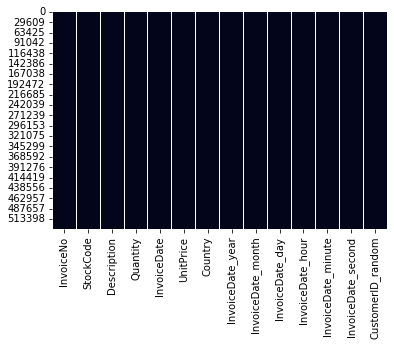

In [52]:
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

No missing or duplicate values now.

We have 536641 rows and 14 columns after handling duplicate and missing values.

#**Exploratory data analysis**

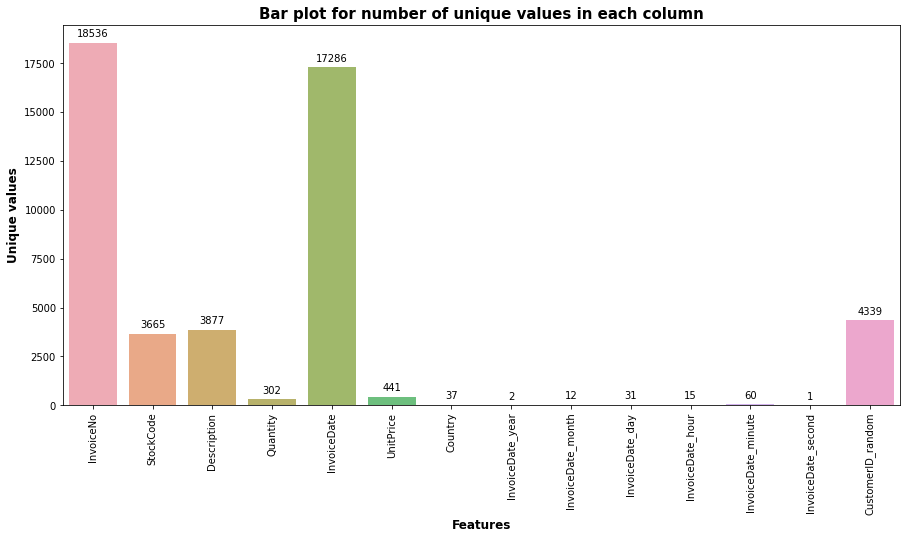

In [53]:
unique_df=pd.DataFrame()
unique_df['Features']=dataset.columns
unique=[]
for i in dataset.columns:
  unique.append(dataset[i].nunique())
unique_df['Uniques']=unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [54]:
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


In [55]:
Description_df.tail()

,Description_Name,Count
3872,ANT SILVER TURQUOISE BOUDICCA RING,1
3873,SCALLOP SHELL SOAP DISH,1
3874,FLOWER FAIRY 5 SUMMER DRAW LINERS,1
3875,"PEARL & SHELL 42""NECKL. IVORY",1
3876,BLUE FELT HANGING HEART WITH FLOWER,1


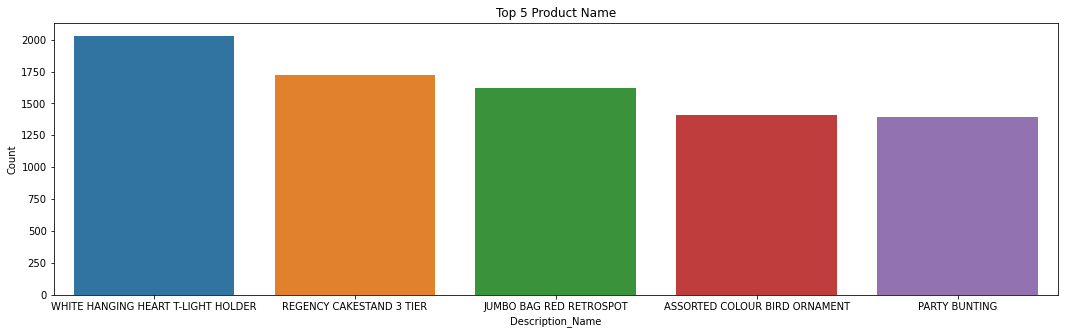

In [56]:
plt.figure(figsize=(18,5))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

###**Top product  based on maximum selling  are :**
    1.WHITE HANGING HEART T-LIGHT HOLDER,
    2.REGENCY CAKESTAND 3 TIER
    3.JUMBO BAG RED RETROSPOT
    4.PARTY BUNTING
    5.LUNCH BAG RED RETROSPOT

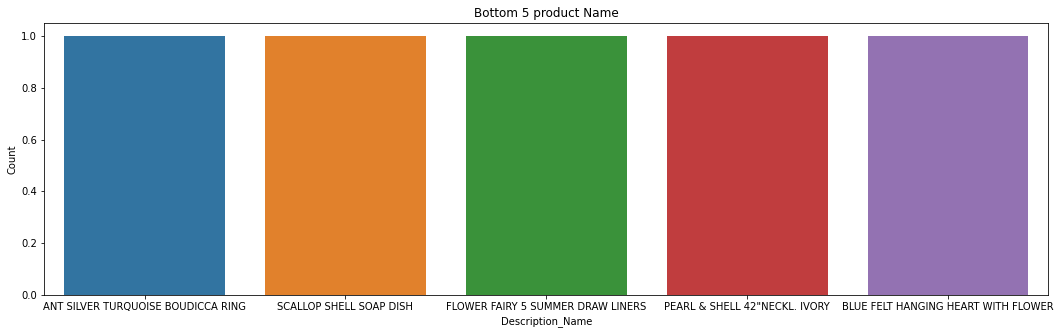

In [57]:
plt.figure(figsize=(18,5))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])